In [1]:
#Importing libraries
import pandas as pd 
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
from scipy import stats 
%matplotlib inline
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
pwd #Location of files

'C:\\Users\\xxjus\\Desktop\\Mastering Data Science\\Day 6'

# Examining the Train and Test Data

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test = pd.read_csv('test.csv')

In [6]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
#Checking to see the columns 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          92 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Combing Datasets and Analyzing It 

In [9]:
datasets = test, train
df = pd.concat(datasets)

In [10]:
df.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276
3,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154
4,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,NaN,3101298


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          296 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [12]:
df.corr()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Age,1.000000,0.178740,-0.150917,0.028814,-0.408106,-0.243699,-0.077221
Fare,0.178740,1.000000,0.221539,0.031428,-0.558629,0.160238,0.257307
Parch,-0.150917,0.221539,1.000000,0.008942,0.018322,0.373587,0.081629
PassengerId,0.028814,0.031428,0.008942,1.000000,-0.038354,-0.055224,-0.005007
Pclass,-0.408106,-0.558629,0.018322,-0.038354,1.000000,0.060832,-0.338481
SibSp,-0.243699,0.160238,0.373587,-0.055224,0.060832,1.000000,-0.035322
Survived,-0.077221,0.257307,0.081629,-0.005007,-0.338481,-0.035322,1.000000


In [13]:
df.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [14]:
#Finding Null Values 
null_columns= df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Age          263
Cabin       1013
Embarked       2
Fare           1
Survived     418
dtype: int64

# Examining Survival Counts in Gender and Age

In [15]:
age_gender = df.groupby('Sex')['Age'].mean()
age_gender

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

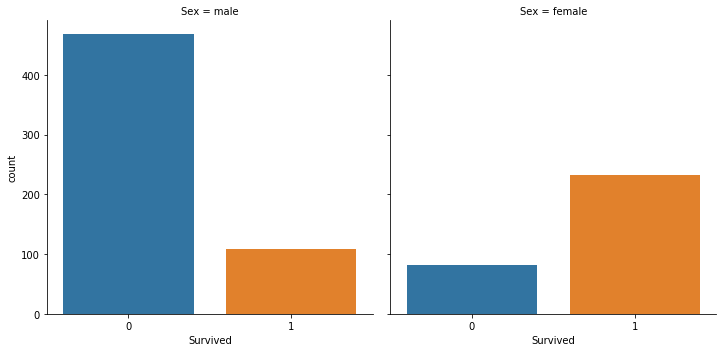

In [16]:
sns.factorplot(x='Survived', col='Sex', kind='count', data=train); #Females were more likely to survive

In [17]:
df['Age'].isnull().sum()

263

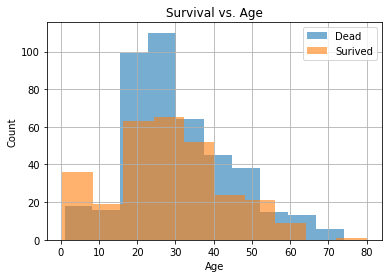

In [18]:
train.groupby('Survived').Age.hist(alpha=0.6,  bins = 10)
plt.title('Survival vs. Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Dead','Surived']);
#Younger people were more likely to survive

# Fill in Missing Embarked Value

In [19]:
df['Embarked'].unique()

array(['Q', 'S', 'C', nan], dtype=object)

In [20]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [21]:
#Finding the specific null value for Embarked
df.loc[df['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


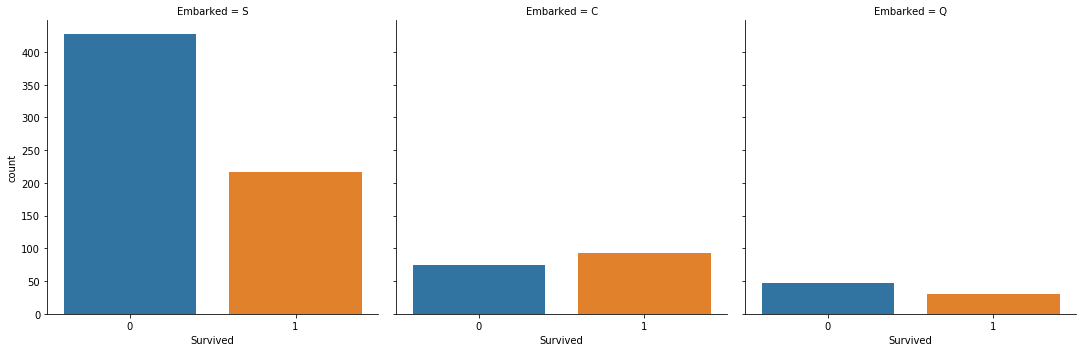

In [22]:
sns.factorplot(x='Survived', col='Embarked', kind='count', data=train);
#Many people came from Port S 

In [23]:
df['Embarked'].fillna('S', inplace=True)

In [24]:
df['Embarked'].notnull().sum()

1309

# Filling in Missing Value for Fare

In [25]:
#Finding the specific null value for Fare
df.loc[df['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [26]:
df.groupby('Pclass')['Fare'].mean()

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

In [27]:
df['Fare'].fillna(13.30, inplace=True)

In [28]:
df.loc[df['PassengerId'] == 1044] 

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,NaN,S,13.3,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


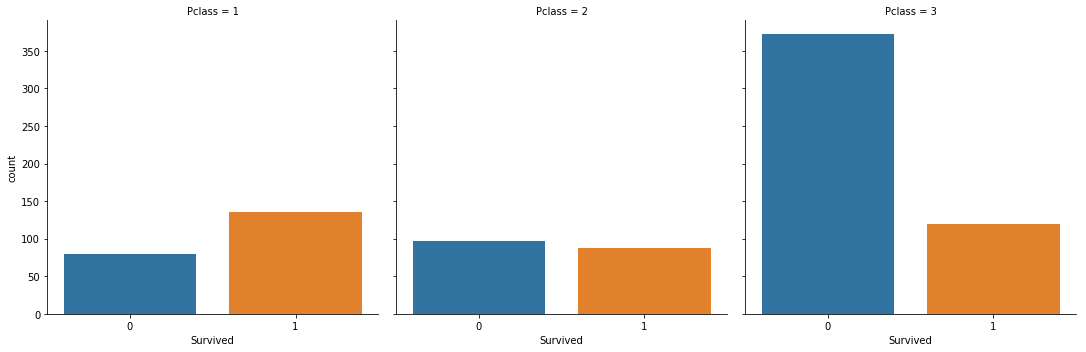

In [29]:
sns.factorplot(x='Survived', col='Pclass', kind='count', data=train); #Pclass 1 more likely to survive

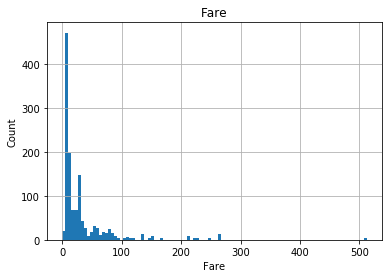

In [30]:
df.hist('Fare', bins=100)
plt.xlabel('Fare')
plt.ylabel('Count');

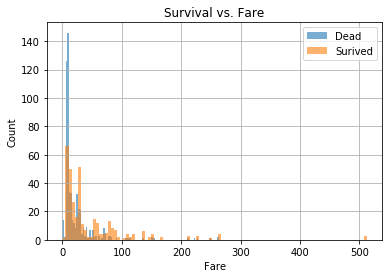

In [31]:
df.groupby('Survived').Fare.hist(alpha=0.6, bins = 100)
plt.title('Survival vs. Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend(['Dead','Surived']);
#People who paid higher Fares are more likely to survive. 

# Filling in Missing Values for Cabin 

In [32]:
df['Cabin'].value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C78                4
B96 B98            4
F2                 4
D                  4
F4                 4
F33                4
C22 C26            4
B51 B53 B55        3
A34                3
E34                3
E101               3
C101               3
B58 B60            3
E44                2
B49                2
B28                2
C62 C64            2
B78                2
C83                2
D20                2
C65                2
D30                2
D26                2
C31                2
E31                2
E67                2
C46                2
                  ..
E40                1
D40                1
D38                1
B42                1
B38                1
F E46              1
B101               1
B61                1
C53                1
B30                1
C95                1
D50                1
F                  1
C128               1
A23                1
C97                1
A21          

In [33]:
df['Cabin'].isnull().sum()

1013

In [34]:
df['Cabin'].fillna('Unknown', inplace=True)

# Fixing Titles to Help Predict Survival 

In [35]:
#Splitting the Titles from Name
df['Title'] = df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [36]:
pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [37]:
#Creating a dictionary to simplify the titles
d = {"Mr":"Mr",
    "Rev":"Royalty", "Capt":"Royalty", "Jonkheer":"Royalty", "Sir":"Royalty", "Don":"Royalty",
    "Dona":"Royalty", "Lady":"Royalty", "the Countess":"Royalty",
    "Mrs":"Mrs", "Mme":"Mrs",
    "Miss":"Miss", "Mlle": "Miss", "Ms":"Miss",
    "Dr":"Royalty", "Major":"Royalty", "Col":"Royalty",
    "Master": "Master"
    }

In [38]:
#Creating a new column for Title in df
df['Title'] = df['Title'].map(d) 

In [39]:
df['Title'].value_counts()

Mr         757
Miss       264
Mrs        198
Master      61
Royalty     29
Name: Title, dtype: int64

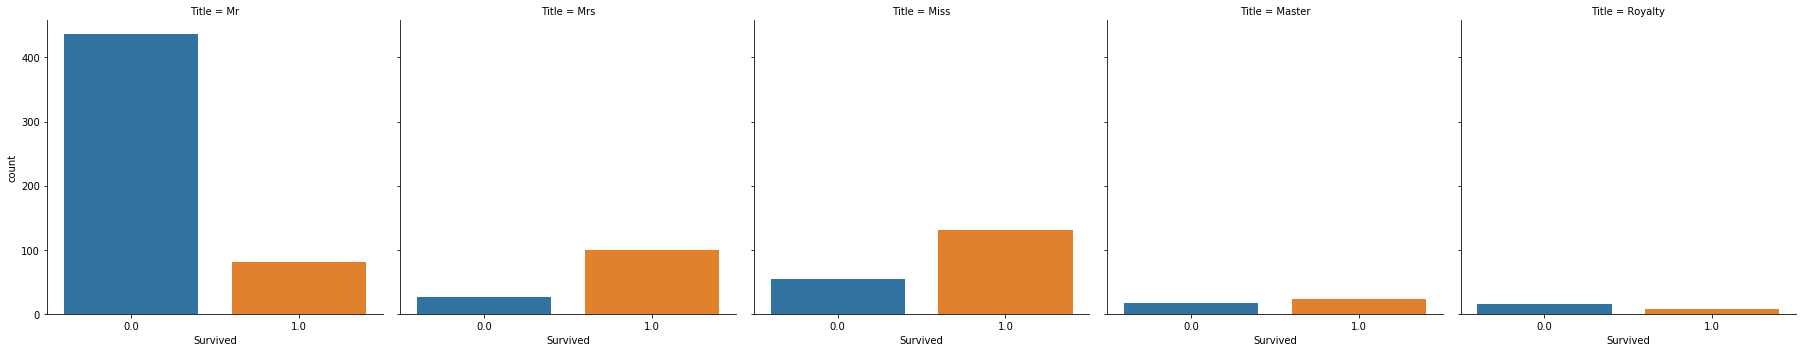

In [40]:
sns.factorplot(x='Survived', col='Title', kind='count', data= df); 

# Adding in Family 

In [41]:
df['Family'] = df.SibSp + df.Parch +1 
#Adding in a Family column in df to find out how many relatives came along 

In [42]:
df['Family']

0       1
1       2
2       1
3       1
4       3
5       1
6       1
7       3
8       1
9       3
10      1
11      1
12      2
13      2
14      2
15      2
16      1
17      1
18      2
19      1
20      2
21      2
22      1
23      2
24      5
25      2
26      2
27      1
28      1
29      3
       ..
861     2
862     1
863    11
864     1
865     1
866     2
867     1
868     1
869     3
870     1
871     3
872     1
873     1
874     2
875     1
876     1
877     1
878     1
879     2
880     2
881     1
882     1
883     1
884     1
885     6
886     1
887     1
888     4
889     1
890     1
Name: Family, Length: 1309, dtype: int64

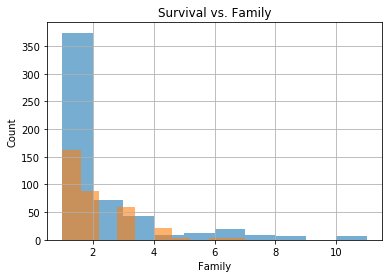

In [43]:
df.groupby('Survived').Family.hist(alpha=0.6);
plt.title('Survival vs. Family')
plt.xlabel('Family')
plt.ylabel('Count');
#People with less relatives onboard were more likely to survive

# Adding in Missing Values for Age 

In [44]:
df.groupby(['Sex','Title','Pclass'])['Age'].median()

Sex     Title    Pclass
female  Miss     1         30.0
                 2         20.0
                 3         18.0
        Mrs      1         45.0
                 2         30.5
                 3         31.0
        Royalty  1         43.5
male    Master   1          6.0
                 2          2.0
                 3          6.0
        Mr       1         41.5
                 2         30.0
                 3         26.0
        Royalty  1         49.5
                 2         41.5
Name: Age, dtype: float64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 14 columns):
Age            1046 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
Family         1309 non-null int64
dtypes: float64(3), int64(5), object(6)
memory usage: 193.4+ KB


In [46]:
df.Age.fillna(df.groupby(['Sex','Title','Pclass']).transform('median').Age, inplace=True)
#Filled in missing values for Age by using the median based on the criteria of sex, title, and pclass. 

# Creating Dummy Variables 

In [47]:
df.info()
#Checking one more time if I had filled in the missing values. Only Surived is still missing because we 
#are trying to predict it.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 14 columns):
Age            1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
Family         1309 non-null int64
dtypes: float64(3), int64(5), object(6)
memory usage: 193.4+ KB


In [48]:
#Drop Values First
df.drop(['Cabin'], axis=1, inplace=True)
df.drop(['Name'], axis=1, inplace =True)
df.drop(['PassengerId'], axis=1, inplace =True)
df.drop(['Ticket'], axis=1, inplace=True)
df.drop(['SibSp'], axis=1, inplace=True)
df.drop(['Parch'], axis=1, inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 8 columns):
Age         1309 non-null float64
Embarked    1309 non-null object
Fare        1309 non-null float64
Pclass      1309 non-null int64
Sex         1309 non-null object
Survived    891 non-null float64
Title       1309 non-null object
Family      1309 non-null int64
dtypes: float64(3), int64(2), object(3)
memory usage: 132.0+ KB


In [50]:
df['Pclass'] = df['Pclass'].astype('category')

In [51]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [52]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 13 columns):
Age              1309 non-null float64
Fare             1309 non-null float64
Survived         891 non-null float64
Family           1309 non-null int64
Embarked_Q       1309 non-null uint8
Embarked_S       1309 non-null uint8
Pclass_2         1309 non-null uint8
Pclass_3         1309 non-null uint8
Sex_male         1309 non-null uint8
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8
Title_Royalty    1309 non-null uint8
dtypes: float64(3), int64(1), uint8(9)
memory usage: 102.6 KB


# Splitting the Data to Train and Test 

In [53]:
df_test = df_dummies[:418]

In [54]:
df_test.head(10)

,Age,Fare,Survived,Family,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Royalty
0,34.5,7.8292,NaN,1,1,0,0,1,1,0,1,0,0
1,47.0,7.0000,NaN,2,0,1,0,1,0,0,0,1,0
2,62.0,9.6875,NaN,1,1,0,1,0,1,0,1,0,0
3,27.0,8.6625,NaN,1,0,1,0,1,1,0,1,0,0
4,22.0,12.2875,NaN,3,0,1,0,1,0,0,0,1,0
5,14.0,9.2250,NaN,1,0,1,0,1,1,0,1,0,0
6,30.0,7.6292,NaN,1,1,0,0,1,0,1,0,0,0
7,26.0,29.0000,NaN,3,0,1,1,0,1,0,1,0,0
8,18.0,7.2292,NaN,1,0,0,0,1,0,0,0,1,0
9,21.0,24.1500,NaN,3,0,1,0,1,1,0,1,0,0


In [55]:
df_train = df_dummies[418:]

In [56]:
df_train.head(10)

,Age,Fare,Survived,Family,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Royalty
0,22.0,7.2500,0.0,2,0,1,0,1,1,0,1,0,0
1,38.0,71.2833,1.0,2,0,0,0,0,0,0,0,1,0
2,26.0,7.9250,1.0,1,0,1,0,1,0,1,0,0,0
3,35.0,53.1000,1.0,2,0,1,0,0,0,0,0,1,0
4,35.0,8.0500,0.0,1,0,1,0,1,1,0,1,0,0
5,26.0,8.4583,0.0,1,1,0,0,1,1,0,1,0,0
6,54.0,51.8625,0.0,1,0,1,0,0,1,0,1,0,0
7,2.0,21.0750,0.0,5,0,1,0,1,1,0,0,0,0
8,27.0,11.1333,1.0,3,0,1,0,1,0,0,0,1,0
9,14.0,30.0708,1.0,2,0,0,1,0,0,0,0,1,0


In [57]:
df_test.shape, df_train.shape

((418, 13), (891, 13))

# Making Predictions

In [58]:
#Import 
from sklearn.naive_bayes import GaussianNB
g = GaussianNB()
from sklearn.naive_bayes import BernoulliNB
b = BernoulliNB()
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
r = RandomForestClassifier()
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

algorithms=[g,b,k,log,d,r,clf]
names=['GaussianNB','BernoulliNB','K Nearest','Logistic','Single Tree',
      'Random Forest','Gradient Boost']

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [60]:
#Setting up Prediction variables 
X = df_train.drop(['Survived'], axis = 1)
y = df_train['Survived']
xtest = df_test.drop(['Survived'], axis = 1)
ytest = df_test['Survived']

In [61]:
x_test, x_train, y_test, y_train =train_test_split(X, y, test_size=.8, random_state=41)

In [62]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((713, 12), (713,), (178, 12), (178,))

In [63]:
#Called a function to find Accuracy, Precision, Recall, and F1_Score
def tDMassess(x_train, y_train, algorithms = algorithms, names = names):
    # fit the data
    for i in range(len(algorithms)):
        algorithms[i] = algorithms[i].fit(x_train, y_train)
    # print metrics
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for i in range(len(algorithms)):
        if accuracy_score(y_train, algorithms[i].predict(x_train)) == 1:
            accuracy.append(0)
        else:   
            accuracy.append(accuracy_score(y_train, algorithms[i].predict(x_train)))
        if precision_score(y_train, algorithms[i].predict(x_train)) == 1:
            precision.append(0)
        else:   
            precision.append(accuracy_score(y_train, algorithms[i].predict(x_train)))
        if recall_score(y_train, algorithms[i].predict(x_train)) == 1:
            recall.append(0)
        else:   
            recall.append(accuracy_score(y_train, algorithms[i].predict(x_train)))
        if f1_score(y_train, algorithms[i].predict(x_train)) == 1:
            f1.append(0)
        else:   
            f1.append(accuracy_score(y_train, algorithms[i].predict(x_train)))
    metrics = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall', 'F1'], index = names)
    metrics['Accuracy'] = accuracy
    metrics['Precision'] = precision
    metrics['Recall'] = recall
    metrics['F1'] = f1
    return metrics.sort_values('F1', ascending = False)

In [64]:
tDMassess(x_train, y_train, algorithms = algorithms, names = names)

,Accuracy,Precision,Recall,F1
Single Tree,0.983170,0.983170,0.983170,0.983170
Gradient Boost,0.964937,0.964937,0.964937,0.964937
Random Forest,0.959327,0.959327,0.959327,0.959327
Logistic,0.823282,0.823282,0.823282,0.823282
K Nearest,0.809257,0.809257,0.809257,0.809257
BernoulliNB,0.796634,0.796634,0.796634,0.796634
GaussianNB,0.793829,0.793829,0.793829,0.793829


In [69]:
#Fitting the data
gbc.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [70]:
prediction = gbc.predict(xtest)

In [71]:
#Setting up my prediction for survival
prediction.mean(), prediction.min(), prediction.max()

(0.33253588516746413, 0.0, 1.0)

# Creating the Kaggle Submission 

In [72]:
passengerid=test['PassengerId']

In [73]:
kaggle=pd.DataFrame({'PassengerId':passengerid, 'Survived':prediction.astype(int)})

In [74]:
kaggle.to_csv('Predictions.csv',index=False)

In [75]:
kaggle.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


I received a Kaggle score of .78 which is in the top 40%. 